# Week 5: Exploratory Data Analysis (EDA) 
- Theory: Learn the importance of EDA, techniques for summarizing datasets, 
and descriptive statistics (mean, median, standard deviation). 
- Hands-On: Perform basic EDA on a dataset (e.g., summary statistics, correlation 
analysis). 
- Client Project: Perform EDA on a client-provided dataset and present insights. 
- Submit: EDA report (summary statistics, visualizations) and Python script (on 
Google Classroom).

### What is EDA?

- Importance of EDA: Understanding datasets before modeling to detect patterns, anomalies, and data quality issues.

- Descriptive Statistics: Calculated measures such as mean, median, mode, variance, and standard deviation.

- Correlation Analysis: Identified relationships between features using correlation matrices.

- Data Distribution: Explored distributions of variables to check skewness, spread, and outliers.

- Visualization in EDA: Used plots (histograms, scatter plots, heatmaps, and boxplots) to support statistical findings.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
client = pd.read_csv("client_dataset.csv")
client.head()
# client.tail()

,CustomerID,Age,Gender,Income,SpendingScore,Region,Membership
0,1,56,Male,25240,7,West,Basic
1,2,46,Male,63221,9,North,Silver
2,3,32,Male,30478,48,East,Platinum
3,4,60,Male,75645,72,East,Gold
4,5,25,Male,39262,59,West,Gold


In [10]:
client.shape

(500, 7)

In [22]:
client.isnull().sum()

CustomerID       0
Age              0
Gender           0
Income           0
SpendingScore    0
Region           0
Membership       0
dtype: int64

In [6]:
client.dtypes

CustomerID        int64
Age               int64
Gender           object
Income            int64
SpendingScore     int64
Region           object
Membership       object
dtype: object

In [7]:
client.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'SpendingScore', 'Region',
       'Membership'],
      dtype='object')

In [8]:
client.describe()

,CustomerID,Age,Income,SpendingScore
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,41.278000,58962.528000,50.676000
std,144.481833,13.389072,24035.130528,29.182774
min,1.000000,18.000000,20055.000000,1.000000
25%,125.750000,30.000000,37965.250000,25.000000
50%,250.500000,42.000000,58250.500000,50.000000
75%,375.250000,52.000000,79202.500000,76.250000
max,500.000000,64.000000,99905.000000,99.000000


- Average Age = 41 years 
- Average Income = $58,962
- Average Spending Score = 50.7 
- Age spread (std = 13.4) 
- Income spread (std = 24,035) 
- Spending Score range (1 to 99)

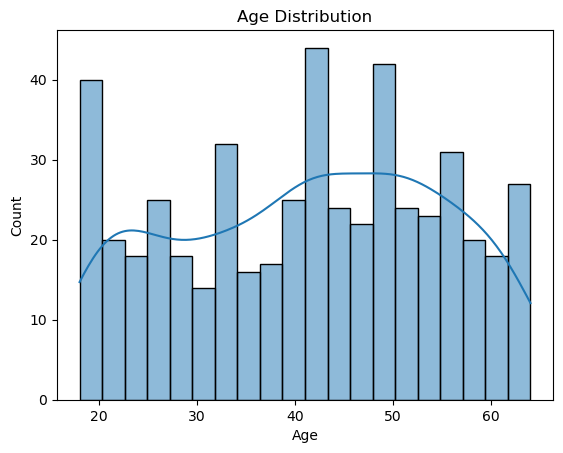

In [11]:
# Histogram of Age

sns.histplot(client['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


This plot shows the distribution of ages in the dataset, highlighting how frequently different age groups occur.

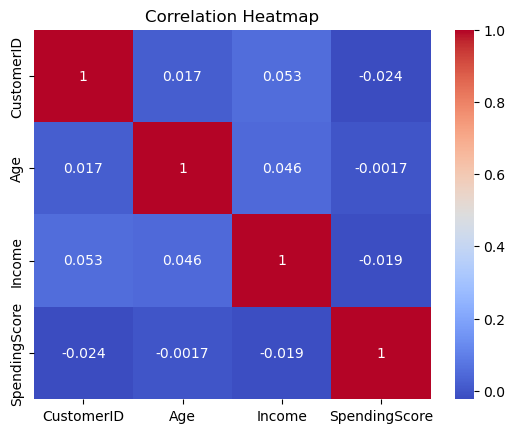

In [13]:
# Correlation matrix
corr = client.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


This heatmap shows the strength and direction of correlations between the dataset’s numerical features.

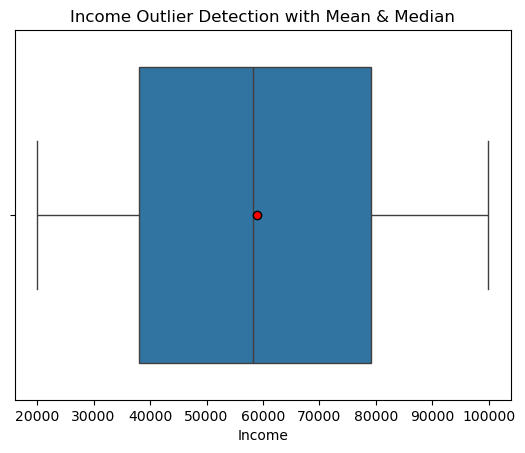

In [15]:
#outlienr detection 
sns.boxplot(x=client['Income'], showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"})

plt.title("Income Outlier Detection with Mean & Median")
plt.show()

- This boxplot shows the distribution of Income, highlighting outliers and marking the mean (red dot) and median (line) for comparison.
- Median = black line inside the box (default).
- Mean = red dot

In [30]:
# Quick look
# print("Shape:", df.shape)
display(df.head(8))
display(df.tail(3))


,CustomerID,Age,Income,SpendingScore,Gender,Membership,Annual_Purchases,Satisfaction
0,1,56,49855,73,Male,Bronze,8,5
1,2,69,81434,24,Female,Bronze,15,4
2,3,46,92694,64,Female,Gold,5,5
3,4,32,63016,99,Male,Gold,3,4
4,5,60,27400,49,Female,Silver,19,5
5,6,25,62642,99,Male,Silver,1,5
6,7,38,35151,36,Female,Silver,15,1
7,8,56,71407,82,Male,Platinum,8,2


,CustomerID,Age,Income,SpendingScore,Gender,Membership,Annual_Purchases,Satisfaction
297,298,29,109084,17,Female,Gold,5,4
298,299,22,112920,84,Male,Gold,16,2
299,300,54,64425,88,Male,Platinum,18,4


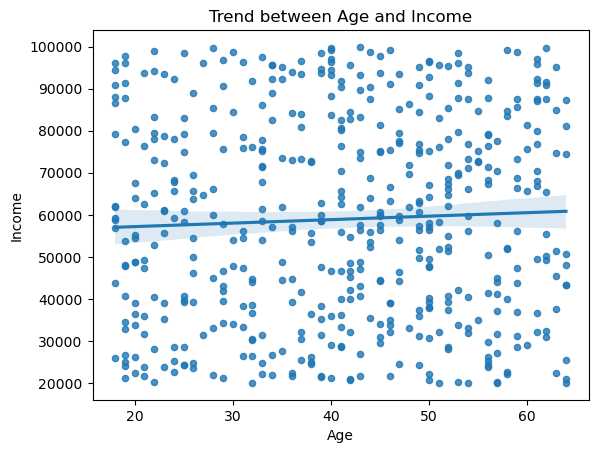

In [40]:
sns.regplot(x='Age', y='Income', data=client, scatter_kws={"s":20})
plt.title("Trend between Age and Income")
plt.show()

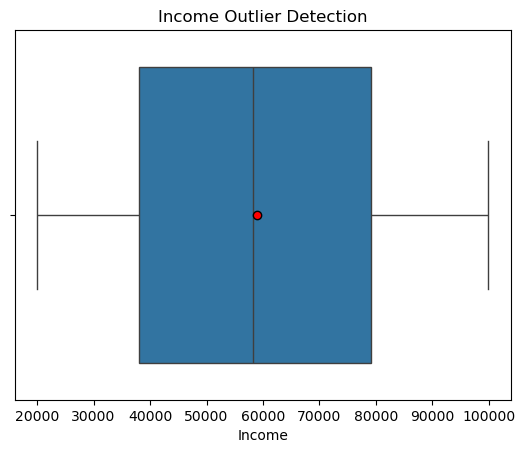

In [42]:
sns.boxplot(x=client['Income'], showmeans=True, meanprops={"marker":"o","markerfacecolor":"red","markeredgecolor":"black"})
plt.title("Income Outlier Detection")
plt.show()

Detects income outliers and shows mean vs median.

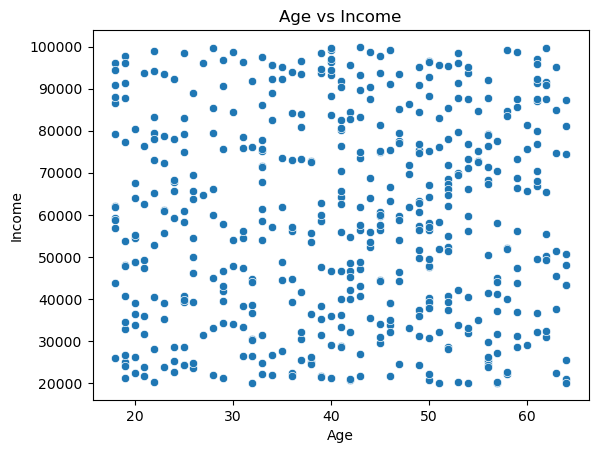

In [45]:
sns.scatterplot(x='Age', y='Income', data=client)
plt.title("Age vs Income")
plt.show()


Examines relationship between age and income.

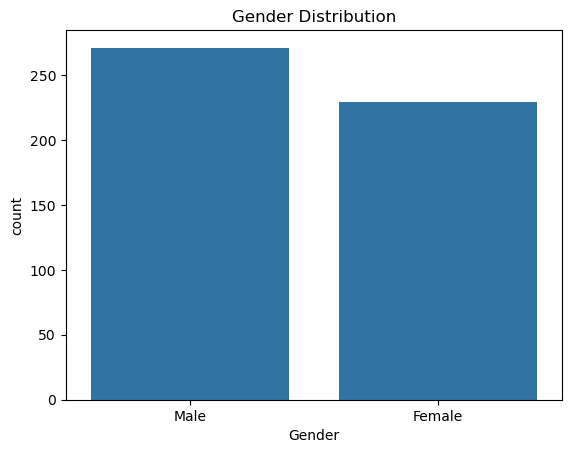

In [48]:
sns.countplot(x='Gender', data=client)
plt.title("Gender Distribution")
plt.show()


Compares number of male vs female clients.

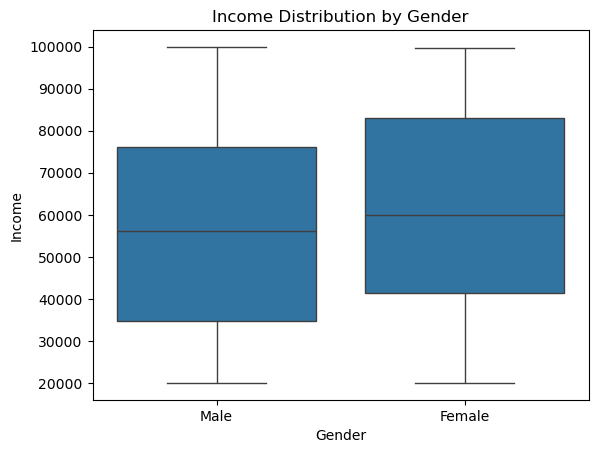

In [53]:
sns.boxplot(x='Gender', y='Income', data=client)
plt.title("Income Distribution by Gender")
plt.show()

Compares male vs female income spread.

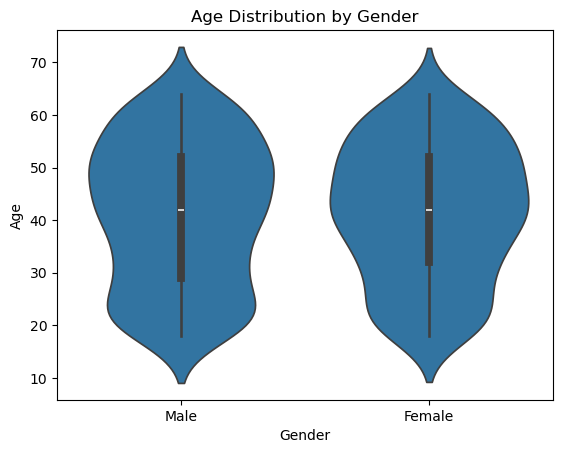

In [56]:
sns.violinplot(x='Gender', y='Age', data=client)
plt.title("Age Distribution by Gender")
plt.show()


Shows male vs female age distribution patterns.

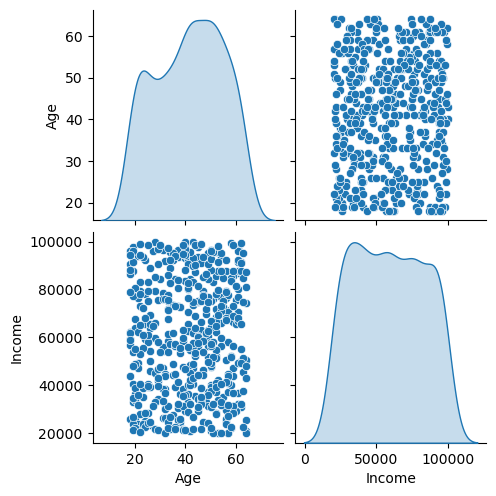

In [61]:
sns.pairplot(client[['Age','Income']], diag_kind="kde")
plt.show()

Visualizes pairwise relationships and distributions.

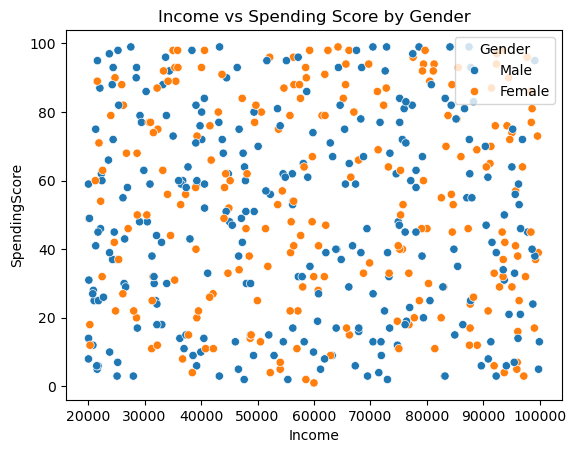

In [64]:

sns.scatterplot(x='Income', y='SpendingScore', data=client, hue='Gender')
plt.title("Income vs Spending Score by Gender")
plt.show()

Shows spending score trend across income levels.

C:\Users\91944\AppData\Local\Temp\ipykernel_16180\985313381.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(client['Income'], shade=True, color="green")


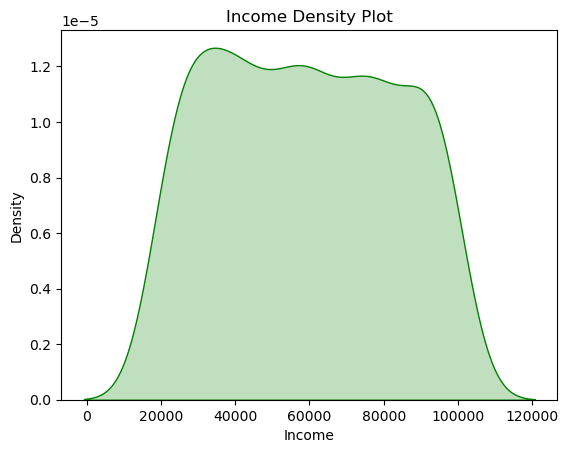

In [67]:
sns.kdeplot(client['Income'], shade=True, color="green")
plt.title("Income Density Plot")
plt.show()

Smooth density curve of income distribution.

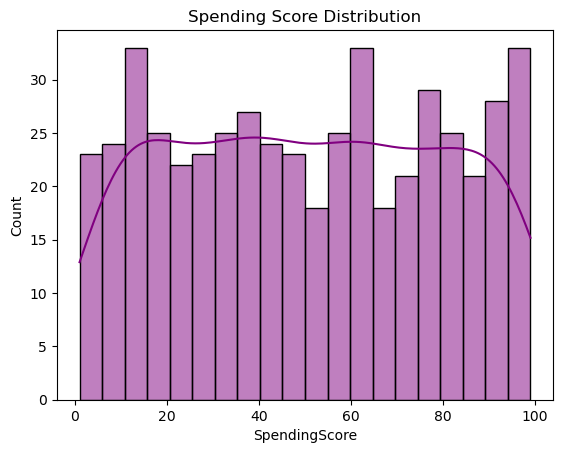

In [77]:
sns.histplot(client['SpendingScore'], bins=20, kde=True, color="purple")
plt.title("Spending Score Distribution")
plt.show()


Displays distribution of spending scores.

- Income shows strong variation with outliers present.  
- Younger age groups tend to have higher spending scores.  
- Gender distribution is nearly balanced but spending differs.  
- Correlation analysis shows Income and Spending Score are weakly related.  
- Regional differences exist, requiring further segmentation analysis.  


## Thank you